## Intelligent Robotics Python Library 사용 예제 2
## Written by 최동일, dongilc@mju.ac.kr
#### BSD License.

In [1]:
import intelligent_robotics as ir
import sympy
sympy.init_printing()

## 예제 2. 예제 5.4의 RP형 로봇

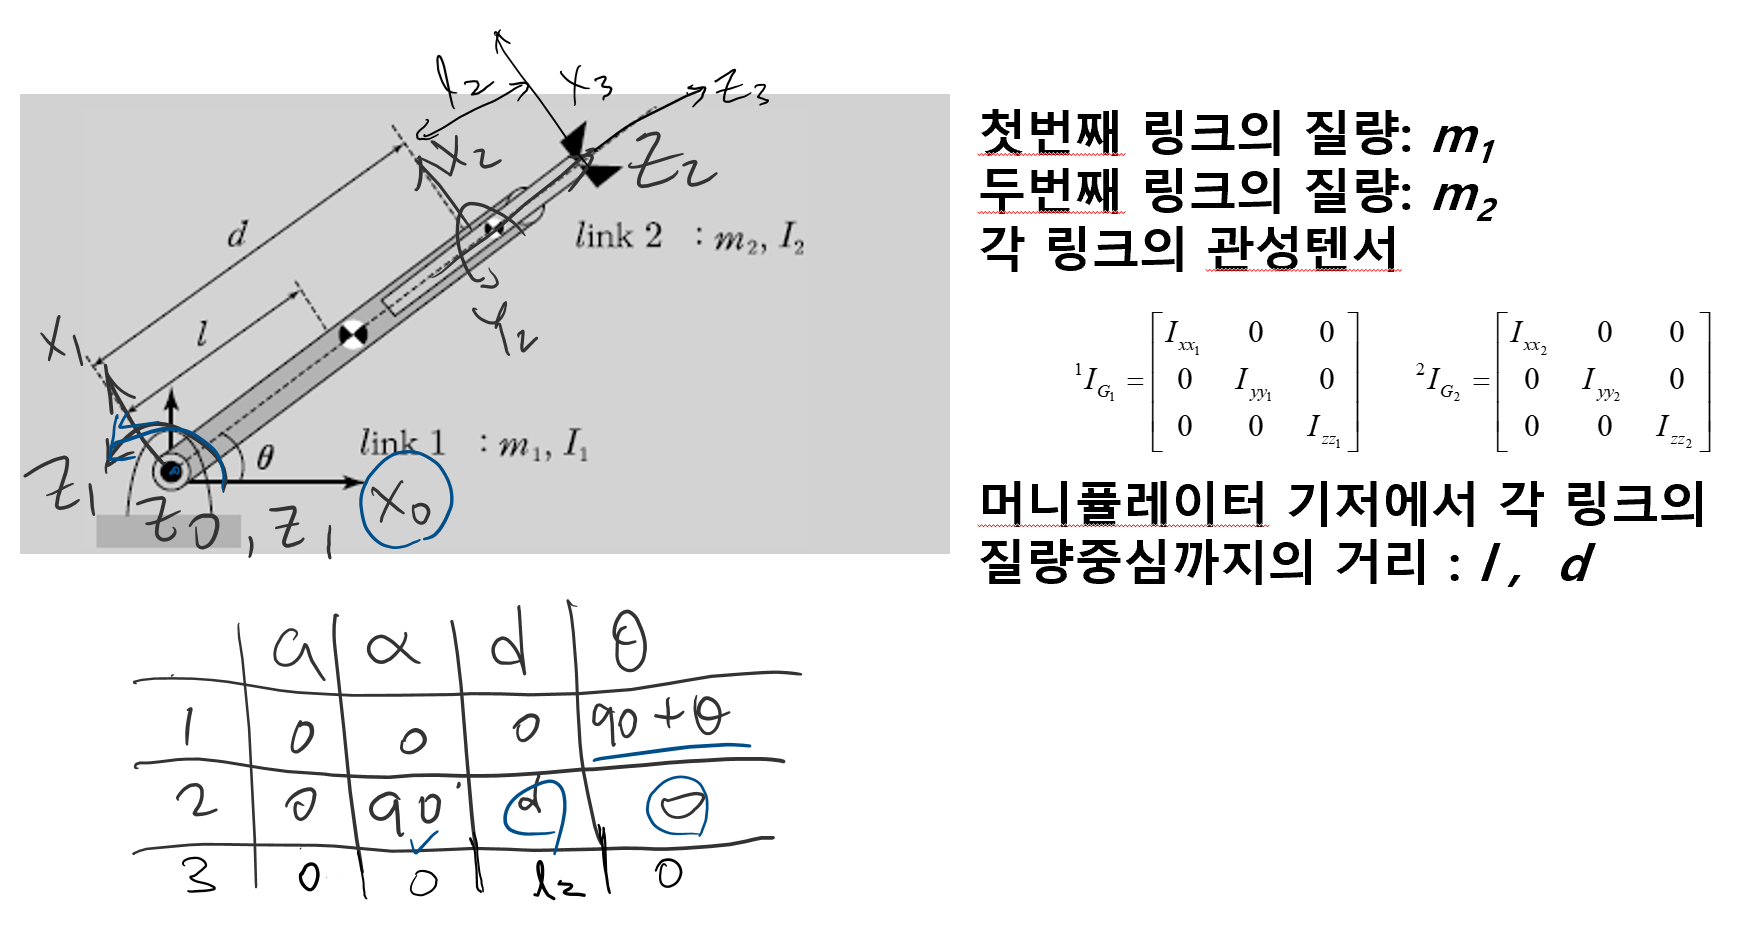

In [2]:
from IPython.display import Image
Image('figure/example5.4.PNG', width=500)

In [3]:
theta,d = ir.dynamicsymbols('theta,d')

In [4]:
l,l2,IG1,IG2,m1,m2 = sympy.symbols('l,l2,IG1,IG2,m1,m2')

#### DH Parameter를 이용한 동차변환 구하기

In [5]:
T01 = ir.DH(0,0,0,theta + sympy.rad(90))

In [6]:
T12 = ir.DH(0,sympy.rad(90),d,0)

In [7]:
T23 = ir.DH(0,0,l2,0)

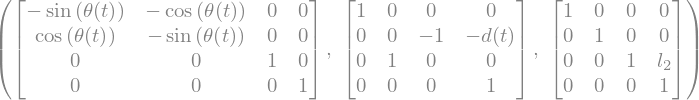

In [8]:
T01, T12, T23

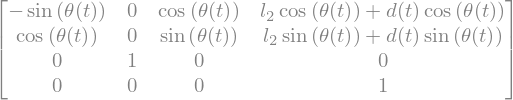

In [9]:
T03 = T01@T12@T23
T03

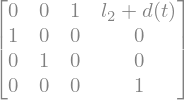

In [10]:
T03.subs({theta:0})

#### 자코비안 구하기

In [11]:
w_0_0 = sympy.Matrix([[0],[0],[0]])
w_1_1 = ir.get_angular_vel_R(T01,w_0_0,theta.diff())
w_2_2 = ir.get_angular_vel_P(T12,w_1_1)
w_3_3 = ir.get_angular_vel_P(T23,w_2_2)

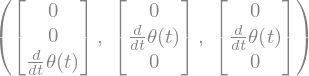

In [12]:
w_1_1,w_2_2,w_3_3

In [13]:
v_0_0 = sympy.Matrix([[0],[0],[0]])
v_1_1 = ir.get_linear_vel_R(T01,w_0_0,v_0_0)
v_2_2 = ir.get_linear_vel_P(T12,w_1_1,v_1_1,d.diff())
v_3_3 = ir.get_linear_vel_P(T23,w_2_2,v_2_2,0)

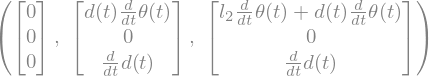

In [14]:
v_1_1,v_2_2,v_3_3

In [15]:
qd = sympy.Matrix([[theta.diff()],[d.diff()]])

In [16]:
J_3_3 = ir.get_Jacobian_from_vel(w_3_3,v_3_3,qd)

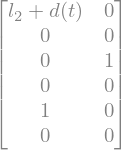

In [17]:
# Body Jacobian
J_3_3

In [18]:
w_0_3 = ir.get_R_from_T(T01*T12*T23)*w_3_3
v_0_3 = ir.get_R_from_T(T01*T12*T23)*v_3_3
J_0_3 = ir.get_Jacobian_from_vel(w_0_3,v_0_3,qd)

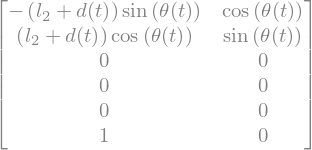

In [19]:
# Space Jacobian
J_0_3

#### 머니퓰레이터 정역학 구하기

In [20]:
f_x, f_y, f_z = sympy.symbols('f_x, f_y, f_z')

In [21]:
f_3_3 = sympy.Matrix([[f_x],[f_y],[f_z]])
n_3_3 = sympy.Matrix([[0],[0],[0]])

In [22]:
f_2_2 = ir.get_statics_force_i(T23, f_3_3)
f_1_1 = ir.get_statics_force_i(T12, f_2_2)

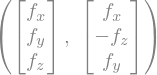

In [23]:
f_2_2, f_1_1

In [24]:
n_2_2 = ir.get_statics_torque_i(T23, n_3_3, f_2_2)
n_1_1 = ir.get_statics_torque_i(T12, n_2_2, f_1_1)

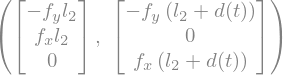

In [25]:
n_2_2, n_1_1

In [26]:
T = sympy.Matrix([[n_1_1[2]],[f_2_2[2]]])
F = sympy.Matrix([[f_x],[f_y],[f_z]])

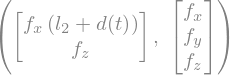

In [27]:
T, F

In [28]:
# T = J^T * F
# tau1           fx
# tau2  =  J^T * fy
# tau3           fz
Jt = ir.get_Jacobian_from_ft(F,T)

In [29]:
# 정역학식을 이용한 자코비안 구하기
J = Jt.T

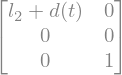

In [30]:
# Body Jacobian
J

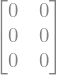

In [31]:
# 속도전파식을 이용해 구한 자코비안과 정역학식을 이용해 구한 자코비안의 결과가 같은지 체크. 모두 0으로 나오면 OK
sympy.simplify(J_3_3[0:3,:] - J)

#### 머니퓰레이터 동역학 구하기

In [32]:
# Netwon-Euler Method. 1. Forward Iteration

In [33]:
w_0_0 = sympy.Matrix([[0],[0],[0]])
w_1_1 = ir.get_angular_vel_R(T01,w_0_0,theta.diff())
w_2_2 = ir.get_angular_vel_P(T12,w_1_1)
w_3_3 = ir.get_angular_vel_R(T23,w_2_2,0)
wd_0_0 = sympy.Matrix([[0],[0],[0]])
wd_1_1 = ir.get_angular_acc_R(T01,w_0_0,wd_0_0,theta.diff(),theta.diff().diff())
wd_2_2 = ir.get_angular_acc_P(T12,wd_1_1)
wd_3_3 = ir.get_angular_acc_R(T23,w_2_2,wd_2_2,0,0)

In [34]:
v_0_0 = sympy.Matrix([[0],[0],[0]])
v_1_1 = ir.get_linear_vel_R(T01,w_0_0,v_0_0)
v_2_2 = ir.get_linear_vel_P(T12,w_1_1,v_1_1,d.diff())
v_3_3 = ir.get_linear_vel_R(T23,w_2_2,v_2_2)
vd_0_0 = sympy.Matrix([[0],[0],[0]])
vd_1_1 = ir.get_linear_acc_R(T01,w_0_0,wd_0_0,vd_0_0)
vd_2_2 = ir.get_linear_acc_P(T12,w_1_1,wd_1_1,w_2_2,v_1_1,vd_1_1,d.diff(),d.diff().diff())
vd_3_3 = ir.get_linear_acc_R(T23,w_2_2,wd_2_2,vd_2_2)

In [35]:
r_1_G1 = sympy.Matrix([[0],[-l],[0]])
r_2_G2 = sympy.Matrix([[0],[0],[0]])
v_1_G1 = ir.get_com_vel(v_1_1,w_1_1,r_1_G1)
v_2_G2 = ir.get_com_vel(v_2_2,w_2_2,r_2_G2)
vd_1_G1 = ir.get_com_acc(vd_1_1,w_1_1,wd_1_1,r_1_G1)
vd_2_G2 = ir.get_com_acc(vd_2_2,w_2_2,wd_2_2,r_2_G2)

In [36]:
# Netwon-Euler Method. 2. Inverse Iteration

In [37]:
g = sympy.symbols('g')

In [38]:
f_3_3 = sympy.Matrix([[0],[0],[0]])
n_3_3 = sympy.Matrix([[0],[0],[0]])
g_0 = sympy.Matrix([[0],[-g],[0]])

In [39]:
f_2_2 = ir.get_dynamics_force_i(T23,T01*T12,m2,g_0,vd_2_G2,f_3_3)
f_1_1 = ir.get_dynamics_force_i(T12,T01,m1,g_0,vd_1_G1,f_2_2)

In [40]:
# 참고 - 실행시간이 좀 오래걸림.
Ixx1,Iyy1,Izz1,Ixx2,Iyy2,Izz2 = sympy.symbols('Ixx1,Iyy1,Izz1,Ixx2,Iyy2,Izz2')
I_1_G1 = sympy.Matrix([[Ixx1,0,0],[0,Iyy1,0],[0,0,Izz1]])
I_2_G2 = sympy.Matrix([[Ixx2,0,0],[0,Iyy2,0],[0,0,Izz2]])
n_2_2 = ir.get_dynamics_torque_i(T23,n_3_3,f_2_2,f_3_3,w_2_2,wd_2_2,r_2_G2,I_2_G2)
n_1_1 = ir.get_dynamics_torque_i(T12,n_2_2,f_1_1,f_2_2,w_1_1,wd_1_1,r_1_G1,I_1_G1)

In [41]:
tau = sympy.Matrix([[n_1_1[2]],[f_2_2[2]]])

In [42]:
qdd = sympy.Matrix([[theta.diff().diff()],[d.diff().diff()]])
M_ne, C_ne, G_ne = ir.get_EoM_from_T(tau,qdd,g)

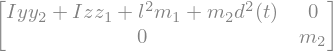

In [43]:
M_ne

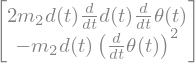

In [44]:
C_ne

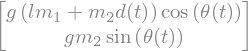

In [45]:
G_ne

In [46]:
# Lagrangian Method

In [47]:
# 운동에너지
T = ir.get_kinectic_energy(m1,v_1_G1,I_1_G1,w_1_1) + ir.get_kinectic_energy(m2,v_2_G2,I_2_G2,w_2_2)

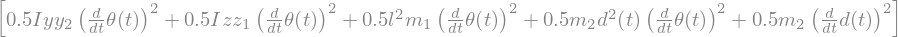

In [48]:
T

In [49]:
# 위치에너지 구하기

In [50]:
T02 = T01*T12
V = ir.get_potential_energy(T01,m1,g_0,r_1_G1) + ir.get_potential_energy(T02,m2,g_0,r_2_G2)

In [51]:
V

In [52]:
# 라그랑지안 구하기
L = ir.get_lagrangian(T,V)

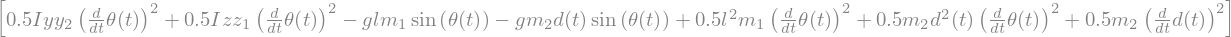

In [53]:
L

In [54]:
q = sympy.Matrix([[theta],[d]])
qd = sympy.Matrix([[theta.diff()],[d.diff()]])
tau = ir.get_torque_from_L(L,q,qd)

In [55]:
# Get Equation of Motion

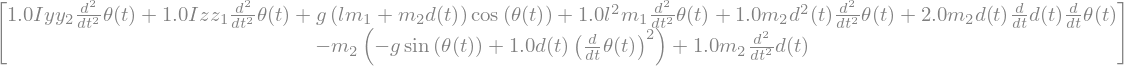

In [56]:
tau

In [57]:
qdd = sympy.Matrix([[theta.diff().diff()],[d.diff().diff()]])
M_l, C_l, G_l = ir.get_EoM_from_T(tau,qdd,g)

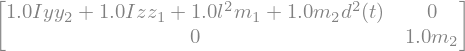

In [58]:
M_l

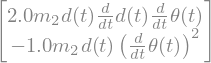

In [59]:
C_l

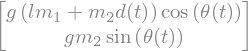

In [60]:
G_l

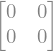

In [61]:
# Newton-Euler 방법과 Lagrangian 방법의 결과가 같은지 체크. 모두 0으로 나오면 OK
sympy.simplify(M_ne - M_l)

In [62]:
# Newton-Euler 방법과 Lagrangian 방법의 결과가 같은지 체크. 모두 0으로 나오면 OK
sympy.simplify(C_ne - C_l)

In [63]:
# Newton-Euler 방법과 Lagrangian 방법의 결과가 같은지 체크. 모두 0으로 나오면 OK
sympy.simplify(G_ne - G_l)